In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from io import StringIO
import sys
import time
import csv
import logging
import os
from os import path
from shapely import wkb, wkt
from shapely.geometry import Point, shape
import traceback
from pywtk.site_lookup import get_3tiersites_from_wkt
import fiona

In [85]:
shape = fiona.open("/Users/julianschmitt/Documents/Schoolwork/Junior Fall/EPS 168/project/tl_2016_us_county.shp")

In [14]:
! ls /Users/julianschmitt/Documents/Schoolwork/Junior\ Fall/EPS\ 168/project/

EPS-168                    pywtk
EPS-168.zip                tl_2016_us_county.dbf
Schlenker_Roberts_2009.pdf tl_2016_us_county.prj
The_Derecho_Project        tl_2016_us_county.qpj
data                       tl_2016_us_county.shp
direcho_data               tl_2016_us_county.shx


In [86]:
shape.schema
first= shape.next()
print(first)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('STATEFP', '31'), ('COUNTYFP', '039'), ('COUNTYNS', '00835841'), ('GEOID', '31039'), ('NAME', 'Cuming'), ('NAMELSAD', 'Cuming County'), ('LSAD', '06'), ('CLASSFP', 'H1'), ('MTFCC', 'G4020'), ('CSAFP', None), ('CBSAFP', None), ('METDIVFP', None), ('FUNCSTAT', 'A'), ('ALAND', 1477895811), ('AWATER', 10447360), ('INTPTLAT', '+41.9158651'), ('INTPTLON', '-096.7885168'), ('ID_1', 31), ('ID_2', 39), ('ID_0', 244), ('ISO', 'USA'), ('NAME_1', None), ('NAME_2', 'Cuming')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(-97.019516, 42.004097), (-97.019519, 42.004933), (-97.019527, 42.007501), (-97.01952899999999, 42.009755), (-97.01952899999999, 42.009775999999995), (-97.01952899999999, 42.009938999999996), (-97.01952899999999, 42.010163), (-97.019538, 42.013931), (-97.01955, 42.014545999999996), (-97.01955, 42.014565), (-97.01955099999999, 42.014607999999996), (-97.01955099999999, 42.014632000000006), (-97.01957999999999, 42.016158)

<ipython-input-86-b9b02c81d77d>:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  first= shape.next()


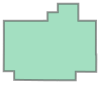

In [40]:
shape(first['geometry'])

In [54]:
corn = pd.read_csv("~/Documents/Schoolwork/Junior Fall/EPS 168/project/data/data_yield/Maize_1999_2019_NASS.csv")

In [125]:
corn_ansi = corn[['County ANSI', 'State ANSI']].dropna()
corn_county = map(str, map(int, corn_ansi['County ANSI'].values))
corn_state = map(str, map(int, corn_ansi['State ANSI'].values))
corn_sc = [" ".join(pair) for pair in zip(corn_state, corn_county)]

In [126]:
len(set(corn_sc))

2305

In [78]:
first['properties']['COUNTYFP']

'011'

In [103]:
state = [poly['properties']["STATEFP"] for poly in shape.values()]
county = [poly['properties']["COUNTYFP"] for poly in shape.values()]
state_county = [" ".join(pair) for pair in zip(state, county)]

In [104]:
len(set(state_county))

3233

In [127]:
len(set(state_county).intersection(set(corn_sc)))

892